In [1]:
# import data
import numpy as np
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

In [2]:
def divide_img(im):
    out=[]
    h = int(im.size[1]/3)
    w = im.size[0]
    pad=int(w*0.1)
    for i in range(3):
        upper=i*h
        box = (0,upper, w,upper + h)
        tmp = im.crop(box)
        img = tmp.crop((pad,pad,tmp.size[0]-pad,tmp.size[1]-pad))
        out.append(img)
    return out

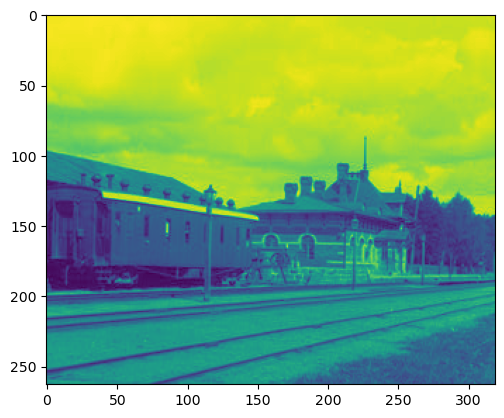

In [36]:
# name = "00125v" 
# name = "00149v" 
# name = "00153v" # base2
# name = "00351v" 
name = "00398v" 
# name = "01112v" 

im=Image.open("data/{}.jpg".format(name)) 

# im=Image.open("data_hires/{}.tif".format(name)) 

# seperate image into three layers
imgs_basic=divide_img(im)
plt.imshow(imgs_basic[0])

In [37]:
def merge(im1, im2, w, h, padding=30):
    width = im1.size[0] + padding
    height =im1.size[1] + padding
    im = Image.new('L', (width, height), (255))
    im.paste(im2, (padding//2+w, padding//2+h))

    return im

5 3
11 4


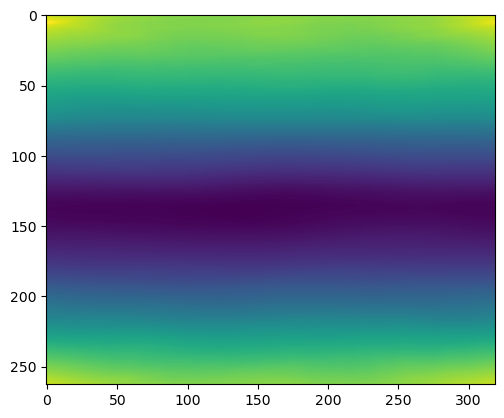

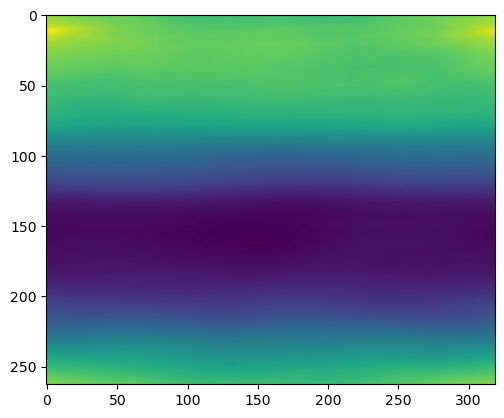

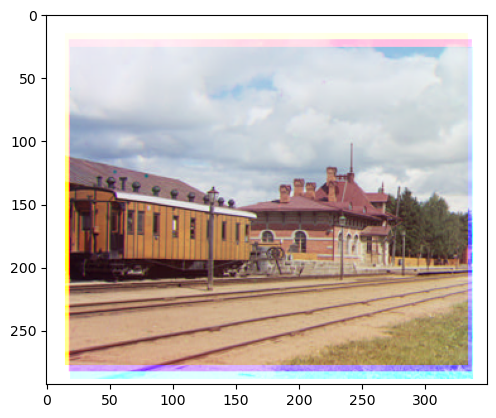

In [38]:
from numpy import unravel_index

baseIdx = 0
base = imgs_basic[baseIdx]
imgs = [img for i,img in enumerate(imgs_basic) if i!= baseIdx]
out_l = []
out_l.append(merge(base,base,0,0))

for img in imgs:
    b0_fft = np.fft.fft2(base)
    b1_fft = np.fft.fft2(img)
    b1_conj = np.conjugate(b1_fft)
    prod = np.multiply(b0_fft, b1_conj)
    ifft = np.fft.ifft2(prod)
    h,w = unravel_index(ifft.argmax(), ifft.shape)
    print(h,w)
    out_l.append(merge(base,img,w,h))
    plt.figure()
    # plt.title(title)
    plt.imshow(ifft.real)

im_out = Image.merge('RGB', (out_l[2], out_l[1], out_l[0]))
plt.figure()
plt.imshow(im_out)